In [3]:
import numpy as np
import pandas as pd


In [4]:
# Feature Engineering

df = pd.read_csv("csv-json-handling/raw_data.csv")

df2 = df.copy()
# creating another column with apply() with some conditions
df2["tax"] =df2["income"].apply(lambda x : "20%" if x >= 50000 else "10%")

df2

,id,name,age,country,gender,income,tax
0,1,John Doe,29.0,USA,Male,55000.0,20%
1,1,John Doe,29.0,USA,Male,55000.0,20%
2,2,Jane Smith,NaN,Canada,Female,62000.0,20%
3,3,Alex,NaN,USA,Unknown,47000.0,10%
4,4,Maria Garcia,34.0,Spain,Female,NaN,10%
5,5,Li Wei,27.0,China,Male,51000.0,20%
6,6,NaN,45.0,India,Female,73000.0,20%
7,7,Ahmed Khan,38.0,NaN,Male,68000.0,20%
8,8,Rachel Lee,29.0,USA,Female,62000.0,20%
9,9,Carlos Ruiz,NaN,Mexico,Male,45000.0,10%


In [5]:
# # to map different values to the existing values
gender_map = {"Male":"M","Female":"F","Unknown":"U"}
df2["gender"] = df2["gender"].map(gender_map)
df2 = df2.assign(new_income = df2["income"]*1.1)

df2["country"] = df2["country"].replace("USA","US")

df2

,id,name,age,country,gender,income,tax,new_income
0,1,John Doe,29.0,US,M,55000.0,20%,60500.0
1,1,John Doe,29.0,US,M,55000.0,20%,60500.0
2,2,Jane Smith,NaN,Canada,F,62000.0,20%,68200.0
3,3,Alex,NaN,US,U,47000.0,10%,51700.0
4,4,Maria Garcia,34.0,Spain,F,NaN,10%,NaN
5,5,Li Wei,27.0,China,M,51000.0,20%,56100.0
6,6,NaN,45.0,India,F,73000.0,20%,80300.0
7,7,Ahmed Khan,38.0,NaN,M,68000.0,20%,74800.0
8,8,Rachel Lee,29.0,US,F,62000.0,20%,68200.0
9,9,Carlos Ruiz,NaN,Mexico,M,45000.0,10%,49500.0


In [6]:
# Data Transformation

# renaming
df2.columns = ["Id","Name","Age","Country","Gender","Income","Tax","New_Income"]
df2.rename(columns={"Income":"Salary"})
df2.rename(index={1:101})

# sorting
df2.sort_values("Income")
df2 = df2.fillna(50)
df2.sort_values("Income",ascending=False)
sorted_df = df2.sort_values(["Income","Age"])

sorted_df.sort_index()

#reset
sorted_df.reset_index()

# ranking
sorted_df["Ranking"] = sorted_df["Income"].rank()

# in reversed manner
sorted_df["Ranking"] = sorted_df["Income"].rank(ascending = False)

# to get whole number
sorted_df["Ranking"] = sorted_df["Income"].rank(method="dense")

# if ranking is ti2
sorted_df["Ranking"] = sorted_df["Income"].rank(method="min")

sorted_df["Ranking"] = sorted_df["Income"].rank(method="max")
sorted_df

,Id,Name,Age,Country,Gender,Income,Tax,New_Income,Ranking
4,4,Maria Garcia,34.0,Spain,F,50.0,10%,50.0,1.0
9,9,Carlos Ruiz,50.0,Mexico,M,45000.0,10%,49500.0,2.0
3,3,Alex,50.0,US,U,47000.0,10%,51700.0,3.0
5,5,Li Wei,27.0,China,M,51000.0,20%,56100.0,4.0
0,1,John Doe,29.0,US,M,55000.0,20%,60500.0,6.0
1,1,John Doe,29.0,US,M,55000.0,20%,60500.0,6.0
10,10,Emily Davis,31.0,US,50,58000.0,20%,63800.0,7.0
8,8,Rachel Lee,29.0,US,F,62000.0,20%,68200.0,9.0
2,2,Jane Smith,50.0,Canada,F,62000.0,20%,68200.0,9.0
7,7,Ahmed Khan,38.0,50,M,68000.0,20%,74800.0,10.0


In [7]:
# Group by and aggregation of data
# agg() == aggregate()
df2.groupby("Country")["Income"].mean()
df2.groupby("Country")["Income"].min()
df2.groupby("Country")["Income"].agg(["mean","min","max"])
df2.groupby("Country")["Income"].agg(avg_salary="mean",minimum_salary="min",maximum_salary="max")
df2.groupby("Country").agg(
    {
        "Income":"mean",
        "Age":"mean"
    }
)
df2.groupby("Country").agg(
    
        avg_salary = ("Income","mean"),
        avg_age = ("Age","mean")
    
)

,avg_salary,avg_age
Country,,
50,68000.0,38.0
Canada,62000.0,50.0
China,51000.0,27.0
India,73000.0,45.0
Mexico,45000.0,50.0
Spain,50.0,34.0
US,55400.0,33.6


In [8]:
# melt in pandas

# melt - wide to long format
# syntax - melt(id_vars,value_vars,var_name,value_name)


df = pd.DataFrame(
    {
        "country" : ["India","Pakistan","Bangladesh","China"],
        "year" : [2020,2023,2024,2025],
        "sales" : [100,120,90,110],
        "profit" : [20,25,18,22],
        "tax" : [10,11,12,13]
    }
)
melted_df = df.melt(
    id_vars = ["country","year"], # columns we want to keep unchanged.
    value_vars = ["sales","profit","tax"], # columns we gonna melt
    var_name = "metrices", # column name for the melted columns
    value_name = "value"   
)
print(melted_df)
# pivot - long data to wide data
original = melted_df.pivot(
    index = ["country","year"],
    columns = "metrices",
    values = "value"
)
print(original)

       country  year metrices  value
0        India  2020    sales    100
1     Pakistan  2023    sales    120
2   Bangladesh  2024    sales     90
3        China  2025    sales    110
4        India  2020   profit     20
5     Pakistan  2023   profit     25
6   Bangladesh  2024   profit     18
7        China  2025   profit     22
8        India  2020      tax     10
9     Pakistan  2023      tax     11
10  Bangladesh  2024      tax     12
11       China  2025      tax     13
metrices         profit  sales  tax
country    year                    
Bangladesh 2024      18     90   12
China      2025      22    110   13
India      2020      20    100   10
Pakistan   2023      25    120   11


<Axes: xlabel='Age', ylabel='Salary'>

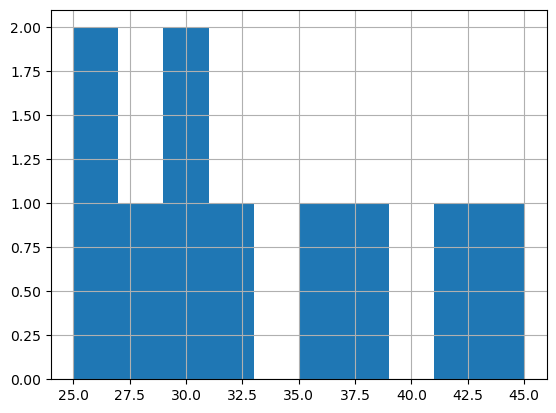

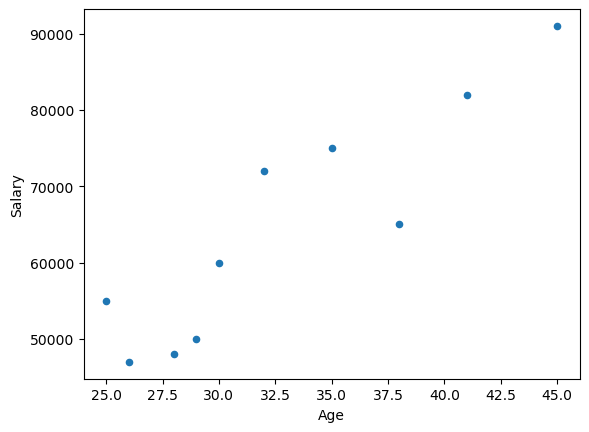

In [9]:
# Basic Visualization with pandas
df = pd.read_csv("csv-json-handling/employee_data.csv")

df["Age"].hist()

df.plot(kind="scatter",x="Age",y="Salary")

In [10]:
# merging and joining data in pandas

df_customers = pd.DataFrame({
    "customer_id": [1, 2, 3, 4, 5],
    "customer_name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "country": ["USA", "India", "UK", "Canada", "USA"]
})


df_orders = pd.DataFrame({
    "order_id": [101, 102, 103, 104, 105],
    "customer_id": [1, 2, 2, 4, 5],
    "order_amount": [250, 400, 150, 300, 500]
})

print(pd.merge(df_customers,df_orders,on="customer_id")) # inner join

print(pd.merge(df_customers,df_orders,on="customer_id",how="left")) # left join

print(pd.merge(df_customers,df_orders,on="customer_id",how="right")) # right join

print(pd.merge(df_customers,df_orders,on="customer_id",how="outer")) # outer join

   customer_id customer_name country  order_id  order_amount
0            1         Alice     USA       101           250
1            2           Bob   India       102           400
2            2           Bob   India       103           150
3            4         David  Canada       104           300
4            5           Eva     USA       105           500
   customer_id customer_name country  order_id  order_amount
0            1         Alice     USA     101.0         250.0
1            2           Bob   India     102.0         400.0
2            2           Bob   India     103.0         150.0
3            3       Charlie      UK       NaN           NaN
4            4         David  Canada     104.0         300.0
5            5           Eva     USA     105.0         500.0
   customer_id customer_name country  order_id  order_amount
0            1         Alice     USA       101           250
1            2           Bob   India       102           400
2            2          

In [14]:
# Data Concatenation

df1 = pd.DataFrame({
    "customer_id": [1, 2, 3, 4, 5],
    "customer_name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "country": ["USA", "India", "UK", "Canada", "USA"]
})


df2 = pd.DataFrame({
    "order_id": [101, 102, 103, 104, 105],
    "customer_id": [1, 2, 2, 4, 5],
    "order_amount": [250, 400, 150, 300, 500]
})

# row-wise concatenation
pd.concat([df1,df2])

# to have ignore old index
pd.concat([df1,df2],ignore_index = True)

# column-wise concatenation
pd.concat([df1,df2],axis=1)

,customer_id,customer_name,country,order_id,customer_id,order_amount
0,1,Alice,USA,101,1,250
1,2,Bob,India,102,2,400
2,3,Charlie,UK,103,2,150
3,4,David,Canada,104,4,300
4,5,Eva,USA,105,5,500
